<a href="https://colab.research.google.com/github/Aline-RB/Analise_Pandas/blob/main/Analise_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
clientes = pd.read_csv('/content/drive/MyDrive/Analise_sucos_vendas/dados/clientes.csv', sep=';',  encoding='utf-8')
produtos =  pd.read_csv('/content/drive/MyDrive/Analise_sucos_vendas/dados/produtos.csv', sep=';',  encoding='utf-8')
vendedores =  pd.read_csv('/content/drive/MyDrive/Analise_sucos_vendas/dados/vendedores.csv', sep=';',  encoding='utf-8')
itens_notas_fiscais =  pd.read_csv('/content/drive/MyDrive/Analise_sucos_vendas/dados/itens_notas_fiscais.csv', sep=',',  encoding='utf-8')
notas_fiscais =  pd.read_csv('/content/drive/MyDrive/Analise_sucos_vendas/dados/notas_fiscais.csv', sep=',',  encoding='utf-8')

Mounted at /content/drive


In [2]:
clientes = clientes.drop('ENDERECO_2', axis=1)

In [3]:
total_clientes = clientes['CPF'].count()
total_clientes

15

In [4]:
clientes_compras = pd.merge(clientes, notas_fiscais, on="CPF", how='inner')
clientes_compras

,CPF,NOME,ENDERECO_1,BAIRRO,CIDADE,ESTADO,CEP,DATA_DE_NASCIMENTO,IDADE,SEXO,LIMITE_DE_CREDITO,VOLUME_DE_COMPRA,PRIMEIRA_COMPRA,MATRICULA,DATA_VENDA,NUMERO,IMPOSTO
0,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,235,2015-01-01,104,0.12
1,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,235,2015-01-01,134,0.12
2,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,235,2015-01-01,165,0.10
3,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,236,2015-01-02,177,0.10
4,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,236,2015-01-02,179,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87872,94387575700,Walber Lontra,R. Cel. Almeida,Piedade,Rio de Janeiro,RJ,22000201,1989-06-20,28,M,60000,12000,1,237,2018-03-28,87950,0.10
87873,94387575700,Walber Lontra,R. Cel. Almeida,Piedade,Rio de Janeiro,RJ,22000201,1989-06-20,28,M,60000,12000,1,236,2018-03-28,87952,0.12
87874,94387575700,Walber Lontra,R. Cel. Almeida,Piedade,Rio de Janeiro,RJ,22000201,1989-06-20,28,M,60000,12000,1,237,2018-03-28,87956,0.10
87875,94387575700,Walber Lontra,R. Cel. Almeida,Piedade,Rio de Janeiro,RJ,22000201,1989-06-20,28,M,60000,12000,1,235,2018-03-28,87959,0.12


In [5]:
linhas_com_nulos = clientes_compras[clientes_compras.isnull().any(axis=1)]
linhas_com_nulos

,CPF,NOME,ENDERECO_1,BAIRRO,CIDADE,ESTADO,CEP,DATA_DE_NASCIMENTO,IDADE,SEXO,LIMITE_DE_CREDITO,VOLUME_DE_COMPRA,PRIMEIRA_COMPRA,MATRICULA,DATA_VENDA,NUMERO,IMPOSTO


In [6]:
clientes_compras['DATA_VENDA'] = pd.to_datetime(clientes_compras['DATA_VENDA'], format='%Y-%m-%d')
filtro_2015 = clientes_compras['DATA_VENDA'].dt.year == 2015
clientes_compras_2015 = clientes_compras[filtro_2015]
clientes_compras_2015

,CPF,NOME,ENDERECO_1,BAIRRO,CIDADE,ESTADO,CEP,DATA_DE_NASCIMENTO,IDADE,SEXO,LIMITE_DE_CREDITO,VOLUME_DE_COMPRA,PRIMEIRA_COMPRA,MATRICULA,DATA_VENDA,NUMERO,IMPOSTO
0,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,235,2015-01-01,104,0.12
1,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,235,2015-01-01,134,0.12
2,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,235,2015-01-01,165,0.10
3,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,236,2015-01-02,177,0.10
4,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,236,2015-01-02,179,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83458,94387575700,Walber Lontra,R. Cel. Almeida,Piedade,Rio de Janeiro,RJ,22000201,1989-06-20,28,M,60000,12000,1,237,2015-12-31,27142,0.10
83459,94387575700,Walber Lontra,R. Cel. Almeida,Piedade,Rio de Janeiro,RJ,22000201,1989-06-20,28,M,60000,12000,1,237,2015-12-31,27149,0.10
83460,94387575700,Walber Lontra,R. Cel. Almeida,Piedade,Rio de Janeiro,RJ,22000201,1989-06-20,28,M,60000,12000,1,236,2015-12-31,27150,0.10
83461,94387575700,Walber Lontra,R. Cel. Almeida,Piedade,Rio de Janeiro,RJ,22000201,1989-06-20,28,M,60000,12000,1,235,2015-12-31,27171,0.10


In [7]:
clientes_frequencia = clientes_compras_2015.groupby(['CPF','NOME'])['DATA_VENDA'].nunique().reset_index()
clientes_frequencia = clientes_frequencia.rename(columns={'DATA_VENDA':'DIAS_COMPRA'})
clientes_frequencia

,CPF,NOME,DIAS_COMPRA
0,492472718,Eduardo Jorge,364
1,1471156710,Érica Carvalho,361
2,2600586709,César Teixeira,364
3,3623344710,Marcos Nougeuira,362
4,5576228758,Petra Oliveira,365
5,5648641702,Paulo César Mattos,365
6,5840119709,Gabriel Araujo,365
7,7771579779,Marcelo Mattos,362
8,8502682733,Valdeci da Silva,363
9,8719655770,Carlos Eduardo,364


In [8]:
clientes_count = clientes_compras_2015.groupby(['CPF','NOME','SEXO'])['NUMERO'].count().to_frame()
clientes_count.rename(columns={'NUMERO':'VENDAS_2015'}, inplace=True)
clientes_count

,,,VENDAS_2015
CPF,NOME,SEXO,
492472718,Eduardo Jorge,M,1886
1471156710,Érica Carvalho,F,1976
2600586709,César Teixeira,M,1957
3623344710,Marcos Nougeuira,M,1868
5576228758,Petra Oliveira,F,1960
5648641702,Paulo César Mattos,M,1981
5840119709,Gabriel Araujo,M,2010
7771579779,Marcelo Mattos,M,1908
8502682733,Valdeci da Silva,M,1927


In [9]:
filtro_fabio = clientes_compras['NOME'] == 'Fábio Carvalho'
fabio_cliente = clientes_compras[filtro_fabio]
fabio_cliente

,CPF,NOME,ENDERECO_1,BAIRRO,CIDADE,ESTADO,CEP,DATA_DE_NASCIMENTO,IDADE,SEXO,LIMITE_DE_CREDITO,VOLUME_DE_COMPRA,PRIMEIRA_COMPRA,MATRICULA,DATA_VENDA,NUMERO,IMPOSTO


Aqui podemos concluir que o cliente Fabio nunca teve uma compra efetuada

In [10]:
filtro_2016 = clientes_compras['DATA_VENDA'].dt.year == 2016
clientes_compras_2016 = clientes_compras[filtro_2016]
clientes_compras_2016

,CPF,NOME,ENDERECO_1,BAIRRO,CIDADE,ESTADO,CEP,DATA_DE_NASCIMENTO,IDADE,SEXO,LIMITE_DE_CREDITO,VOLUME_DE_COMPRA,PRIMEIRA_COMPRA,MATRICULA,DATA_VENDA,NUMERO,IMPOSTO
1976,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,235,2016-01-01,27198,0.12
1977,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,235,2016-01-01,27199,0.12
1978,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,236,2016-01-01,27205,0.12
1979,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,236,2016-01-01,27227,0.10
1980,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0,236,2016-01-01,27246,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85408,94387575700,Walber Lontra,R. Cel. Almeida,Piedade,Rio de Janeiro,RJ,22000201,1989-06-20,28,M,60000,12000,1,237,2016-12-30,54408,0.10
85409,94387575700,Walber Lontra,R. Cel. Almeida,Piedade,Rio de Janeiro,RJ,22000201,1989-06-20,28,M,60000,12000,1,236,2016-12-31,54415,0.10
85410,94387575700,Walber Lontra,R. Cel. Almeida,Piedade,Rio de Janeiro,RJ,22000201,1989-06-20,28,M,60000,12000,1,235,2016-12-31,54416,0.10
85411,94387575700,Walber Lontra,R. Cel. Almeida,Piedade,Rio de Janeiro,RJ,22000201,1989-06-20,28,M,60000,12000,1,236,2016-12-31,54417,0.12


In [11]:
clientes_count_2016 = clientes_compras_2016.groupby(['CPF','NOME'])['NUMERO'].count().to_frame()
clientes_count_2016.rename(columns={'NUMERO':'VENDAS_2016'}, inplace=True)
clientes_count_2016

,,VENDAS_2016
CPF,NOME,
492472718,Eduardo Jorge,2008
1471156710,Érica Carvalho,1913
2600586709,César Teixeira,1906
3623344710,Marcos Nougeuira,2012
5576228758,Petra Oliveira,1997
5648641702,Paulo César Mattos,1934
5840119709,Gabriel Araujo,1938
7771579779,Marcelo Mattos,1879
8502682733,Valdeci da Silva,1992


In [12]:
clientes

,CPF,NOME,ENDERECO_1,BAIRRO,CIDADE,ESTADO,CEP,DATA_DE_NASCIMENTO,IDADE,SEXO,LIMITE_DE_CREDITO,VOLUME_DE_COMPRA,PRIMEIRA_COMPRA
0,1471156710,Érica Carvalho,R. Iriquitia,Jardins,São Paulo,SP,80012212,1990-09-01,27,F,170000,24500,0
1,19290992743,Fernando Cavalcante,R. Dois de Fevereiro,Água Santa,Rio de Janeiro,RJ,22000000,2000-02-12,18,M,100000,20000,1
2,2600586709,César Teixeira,Rua Conde de Bonfim,Tijuca,Rio de Janeiro,RJ,22020001,2000-03-12,18,M,120000,22000,0
3,3623344710,Marcos Nougeuira,Av. Pastor Martin Luther King Junior,Inhauma,Rio de Janeiro,RJ,22002012,1995-01-13,23,M,110000,22000,1
4,492472718,Eduardo Jorge,R. Volta Grande,Tijuca,Rio de Janeiro,RJ,22012002,1994-07-19,23,M,75000,9500,1
5,50534475787,Abel Silva,Rua Humaitá,Humaitá,Rio de Janeiro,RJ,22000212,1995-09-11,22,M,170000,26000,0
6,5576228758,Petra Oliveira,R. Benício de Abreu,Lapa,São Paulo,SP,88192029,1995-11-14,22,F,70000,16000,1
7,5648641702,Paulo César Mattos,Rua Hélio Beltrão,Tijuca,Rio de Janeiro,RJ,21002020,1991-08-30,26,M,120000,22000,0
8,5840119709,Gabriel Araujo,R. Manuel de Oliveira,Santo Amaro,São Paulo,SP,80010221,1985-03-16,32,M,140000,21000,1
9,7771579779,Marcelo Mattos,R. Eduardo Luís Lopes,Brás,São Paulo,SP,88202912,1992-03-25,25,M,120000,20000,1


In [13]:
clientes_uniao = pd.merge( clientes_count, clientes_count_2016, on="NOME", how='inner')
clientes_uniao

,VENDAS_2015,VENDAS_2016
NOME,,
Eduardo Jorge,1886,2008
Érica Carvalho,1976,1913
César Teixeira,1957,1906
Marcos Nougeuira,1868,2012
Petra Oliveira,1960,1997
Paulo César Mattos,1981,1934
Gabriel Araujo,2010,1938
Marcelo Mattos,1908,1879
Valdeci da Silva,1927,1992


In [14]:
clientes_uniao['DIFERENÇA_%'] = ((clientes_uniao['VENDAS_2016'] - clientes_uniao['VENDAS_2015']) / clientes_uniao['VENDAS_2015'] * 100).round(3)
clientes_uniao

,VENDAS_2015,VENDAS_2016,DIFERENÇA_%
NOME,,,
Eduardo Jorge,1886,2008,6.469
Érica Carvalho,1976,1913,-3.188
César Teixeira,1957,1906,-2.606
Marcos Nougeuira,1868,2012,7.709
Petra Oliveira,1960,1997,1.888
Paulo César Mattos,1981,1934,-2.373
Gabriel Araujo,2010,1938,-3.582
Marcelo Mattos,1908,1879,-1.520
Valdeci da Silva,1927,1992,3.373


In [15]:
vendas_diferença = clientes_uniao['DIFERENÇA_%'].mean()
porcentagem_vendas = ((vendas_diferença / clientes_uniao['VENDAS_2015'].sum()) * 100).round(3)
porcentagem_vendas

0.003

In [16]:
clientes_uniao['DIFERENÇA_%'].mean()

0.7602142857142857

In [17]:
#---------------------------------------- ESTATÍSTICA ---------------------------------------------------

In [18]:
from collections import Counter

In [19]:
clientes_idade = clientes['IDADE']
clientes_idade

0     27
1     18
2     18
3     23
4     23
5     22
6     22
7     26
8     32
9     25
10    22
11    34
12    22
13    28
14    16
Name: IDADE, dtype: int64

In [20]:
clientes_f_absoluta = Counter(clientes_idade)
clientes_f_absoluta = pd.DataFrame.from_dict(clientes_f_absoluta, orient='index') # transformando um dicionario em dataframe
clientes_f_absoluta = clientes_f_absoluta.sort_index(ascending=True)
clientes_f_absoluta = clientes_f_absoluta.rename(columns={0: 'fi'})
clientes_f_absoluta

,fi
16,1
18,2
22,4
23,2
25,1
26,1
27,1
28,1
32,1
34,1


In [21]:
clientes_f_absoluta['fr'] = ((clientes_f_absoluta['fi'] / clientes_f_absoluta['fi'].sum()) * 100).round(2)
clientes_f_absoluta['Fi'] = clientes_f_absoluta['fi'].cumsum()
clientes_f_absoluta['Fr'] = ((clientes_f_absoluta['Fi'] / clientes_f_absoluta['fi'].sum()) * 100).round(2)

clientes_f_absoluta

,fi,fr,Fi,Fr
16,1,6.67,1,6.67
18,2,13.33,3,20.00
22,4,26.67,7,46.67
23,2,13.33,9,60.00
25,1,6.67,10,66.67
26,1,6.67,11,73.33
27,1,6.67,12,80.00
28,1,6.67,13,86.67
32,1,6.67,14,93.33
34,1,6.67,15,100.00


# **APRESENTAÇÃO FINAL DAS TABELAS E DOS GRÁFICOS BASEADOS NOS CÓDIGOS DESSE ARQUIVO**

In [22]:
clientes_frequencia

,CPF,NOME,DIAS_COMPRA
0,492472718,Eduardo Jorge,364
1,1471156710,Érica Carvalho,361
2,2600586709,César Teixeira,364
3,3623344710,Marcos Nougeuira,362
4,5576228758,Petra Oliveira,365
5,5648641702,Paulo César Mattos,365
6,5840119709,Gabriel Araujo,365
7,7771579779,Marcelo Mattos,362
8,8502682733,Valdeci da Silva,363
9,8719655770,Carlos Eduardo,364


Podemos analisar nessa tabela a frequência de dias que os clientes compram, no total temos 15 clientes, mas 1 que nunca comprou nada, então temos 14 clientes ativos e quantos dias no ano eles compraram na coluna 'DIAS_COMPRAS'.

In [23]:
clientes_count

,,,VENDAS_2015
CPF,NOME,SEXO,
492472718,Eduardo Jorge,M,1886
1471156710,Érica Carvalho,F,1976
2600586709,César Teixeira,M,1957
3623344710,Marcos Nougeuira,M,1868
5576228758,Petra Oliveira,F,1960
5648641702,Paulo César Mattos,M,1981
5840119709,Gabriel Araujo,M,2010
7771579779,Marcelo Mattos,M,1908
8502682733,Valdeci da Silva,M,1927


Podemos analisar nessa tabela quantos tipos de produtos foram vendidos no ano de 2015 para cada cliente. É diferente da quantidade de cada produto que foi vendido. Uma venda de um produto pode ter x quantidade desse mesmo produto.

In [24]:
clientes_uniao

,VENDAS_2015,VENDAS_2016,DIFERENÇA_%
NOME,,,
Eduardo Jorge,1886,2008,6.469
Érica Carvalho,1976,1913,-3.188
César Teixeira,1957,1906,-2.606
Marcos Nougeuira,1868,2012,7.709
Petra Oliveira,1960,1997,1.888
Paulo César Mattos,1981,1934,-2.373
Gabriel Araujo,2010,1938,-3.582
Marcelo Mattos,1908,1879,-1.520
Valdeci da Silva,1927,1992,3.373


Diferença de vendas de produtos entre os anos de 2016 e 2015 de cada cliente, tendo uma média de 0.76% sendo positiva, concluindo que no ano de 2016 tivemos mais vendas do que no ano de 2015 em 0,003%.

In [25]:
clientes_f_absoluta

,fi,fr,Fi,Fr
16,1,6.67,1,6.67
18,2,13.33,3,20.00
22,4,26.67,7,46.67
23,2,13.33,9,60.00
25,1,6.67,10,66.67
26,1,6.67,11,73.33
27,1,6.67,12,80.00
28,1,6.67,13,86.67
32,1,6.67,14,93.33
34,1,6.67,15,100.00


Nessa tabela podemos ver que 60% de nossos clientes possuem de 16 a 23 anos, de 14 clientes ativos que temos, 10 deles estão entre 16 a 25 anos, portanto nosso público é de jovens adultos, sendo assim será possível montar estratégias de marketing para esse grupo de clientes como prioridade.

# **APRESENTAÇÃO DOS GRÁFICOS**

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt

[Text(0.5, 0, ''), Text(0, 0.5, '')]

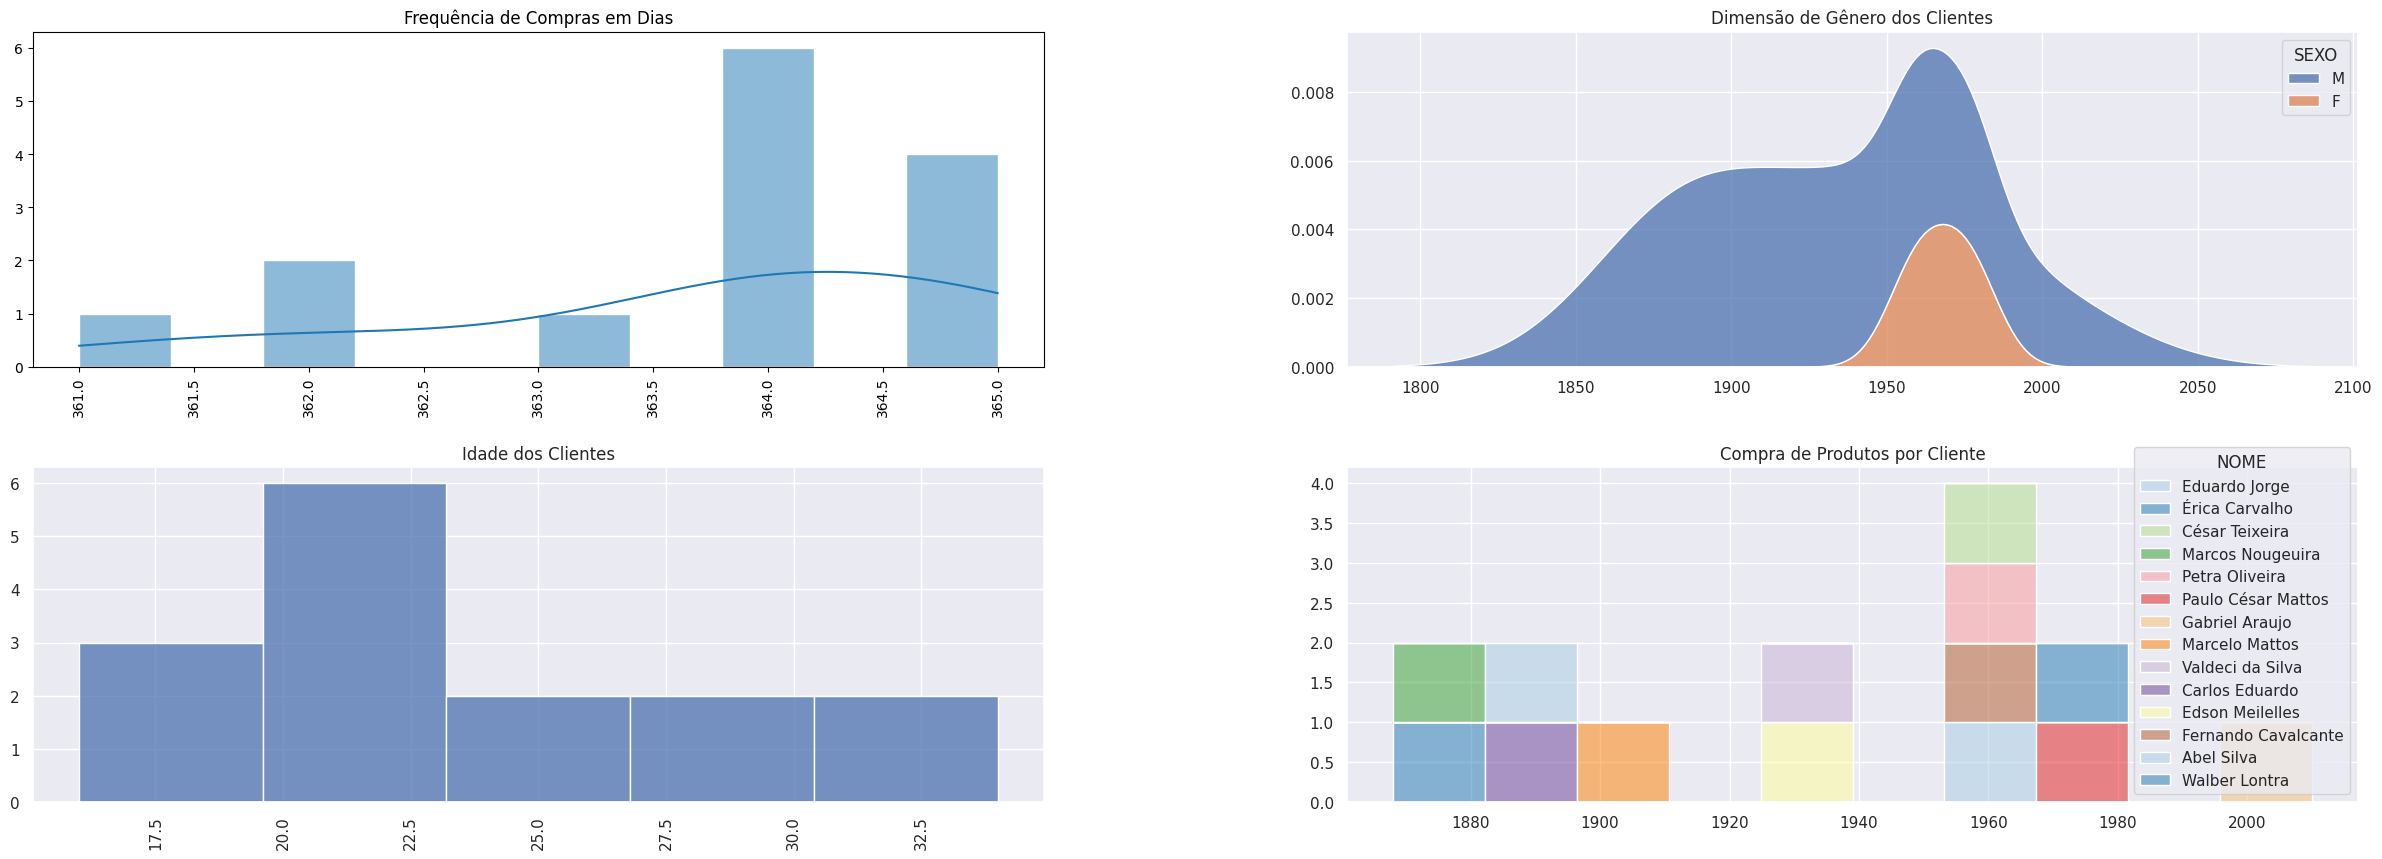

In [27]:
plt.figure(figsize=(30, 10))
plt.subplots_adjust(hspace=0.3,wspace=0.3)

plt.subplot(2, 2, 1)
plt.xticks(rotation=90)
sns.set_theme(style="darkgrid")
ax = sns.histplot(data=clientes_frequencia, x='DIAS_COMPRA',bins=10,kde=True, multiple="stack")
plt.title('Frequência de Compras em Dias')
ax.set(xlabel=None, ylabel=None)


plt.subplot(2, 2, 2)
ax = sns.kdeplot(data=clientes_count, x="VENDAS_2015", hue="SEXO", multiple="stack")
plt.title('Dimensão de Gênero dos Clientes')
ax.set(xlabel=None, ylabel=None)


plt.subplot(2, 2, 3)
sns.set_theme(style="darkgrid")
plt.xticks(rotation=90)
ax= sns.histplot(data=clientes, x="IDADE",bins=5)
ax.set(xlabel=None, ylabel=None)
plt.title('Idade dos Clientes')

plt.subplot(2, 2, 4)
ax = sns.histplot(data=clientes_count, x='VENDAS_2015',bins=10,kde=True,hue="NOME", multiple="stack", palette='Paired')
plt.title('Compra de Produtos por Cliente')
ax.set(xlabel=None, ylabel=None)